<img src="./image/01.jpg" />

## 2020年 隨著Lebron 率領湖人隊奪得總冠軍，許多人開始萌生了一個念頭，Jordan和Lebron究竟誰才是NBA歷史第一人


### 預測: 根據Lebron James現有的數據預測下一場的數據


### 簡單步驟 :
<ol>
    <li >分析Jordan的資料</li>
    <li>分析Lebron的資料</li>
    <li>比較兩者的資料</li>
</ol>
<a href='https://www.kaggle.com/edgarhuichen/nba-players-career-game-log'>資料來源</a>

## 章回目錄

* [專有名詞解釋](#名詞解釋)
* [Jordan的部分](#Jordan的部分)
    * [輸入Jordan的資料](#Jordan的部分)
    * [移除資料中用不到的欄位](#捨棄用不到的欄位)
    * [替換欄位的名稱](#替換欄位名稱)
    * [處理缺失值](#處理缺失值)
    * [場均得分狀況](#Jordan得分狀況)
    * [每場出手的命中率](#每場出手的命中率)
    * [計算各項數據的四分位距](#看看Jordan各項數據的四分位距)
    * [將離群值排除掉](#將離群值排除掉)
    * [熱圖](#查看Jordan各項數據之間的相關程度)
    * [年紀與投籃命中率的關係](#年紀是否會影響Jordan的投籃命中率)
    * [年紀與得分的關係](#年紀是否會影響Jordan的得分)

* [Lebron的部分](#Lebron的資料分析)
    * [輸入Lebron的資料](#引入Lebron的比賽數據)
    * [移除資料中用不到的欄位](#捨棄用不到的columns)
    * [替換欄位的名稱](#把columns的名稱改一下)
    * [處理缺失值](#將NaN補0)
    * [場均得分狀況](#Lebron的得分狀況)
    * [每場出手的命中率](#Lebron的出手命中率，看是否有濫投的情況)
    * [計算各項數據的四分位距](#Lebron的四分位距)
    * [將離群值排除掉](#排除掉離群值)
    * [熱圖](#查看Lebron各項數據之間的相關性)
    * [年紀與投籃命中率的關係](#年紀是否會影響Lebron的投籃命中率)
    * [年紀與得分的關係](#年紀是否會影響Lebron的得分狀況)
    
* [比較Jordan和Lebron之間的數據](#比較Jordan和Lebron的資料)
    * [Jordan的各項數據(長條圖)](#將Jordan的平均數據，以長條圖的方式表現)
    * [Lebron的各項數據(長條圖)](#將Lebron的平均數據，以長條圖的方式表現)
    * [Jordan和Lebron的各項數據差異(長條圖)](#將他們各項平均數距的差距，以長條圖呈現)
    * [Jordan和Lebron的二分球得分狀況](#比較兩人2分球的得分狀況)
    * [Jordan和Lebron的三分球得分狀況](#三分線得分差異)

> ## 名詞解釋
>
> gmae: 一整個完整的賽季總共81場比賽，此指第幾場比賽
>
> date: 比賽的日期
>
> age: 球員的年紀
>
> team: 該球員所屬的隊伍
>
> opp: opponent，對手
>
> result: 比賽結果，贏或輸
>
> mp: 出場時間
>
>fg: field goal，出手命中數
>
>fga: field goal attempts，總共出手多少次
>
>fgp: field goal percentage，fgp=fg/fga，投籃命中率
>
>three: 三分球命中數
>
>threeatt: three attempts，三分球出手次數
>
>threep: three percentage，threep=three/threeatt，三分球命中率
>
>ft: free throw，罰球命中數
>
>fta: free throw attempts，罰球出手次數
>
>ftp: free throw percentage，ftp=ft/fta，罰球命中率
>
>orb: offensive rebounds，進攻時取得的籃板球數
>
>drb: deffensive rebounds，防守時取得的籃板球數
>
>trb: total rebounds，總共取得的籃板球數
>
>ast: assists，助攻數
>
>stl: steals，抄截數
>
>blk: blocks，阻止進攻數(蓋火鍋數)
>
>tov:turnovers，失誤數
>
>pts: points，得分數
>
>game_score: 效率指標，game_score= (PTS + 0.7×OREB + 0.3×DREB + 0.7×AST + STL + 0.7×BLK) + 0.4×FGM - 0.7×FGA - 0.4×(FTA-FTM) - TOV - 0.4×PF 

In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import psutil, sys, gc, math
from scipy import stats
import scipy.stats as ss

from IPython.display import display, HTML

# Free Memory
# (1) 獲取物件及其大小的排序列表 
# (2) 將刪除的物件所佔的記憶體釋放
def memoryClean(dirList):
    print('Total Process Memory Usages: %s' %psutil.Process().memory_info().rss)
    print('Memory Usage Statistics: %s' %str(psutil.virtual_memory()))
    reserved_vars = ['In', 'Out', 'exit', 'quit', 'ipython_vars', 'sys', 'os'
                     'gc', 'IODataDir', 'side_by_side', 'memoryClean', 'np',
                     'pd', 'plt','sns', 'mlab', 'display', 'HTML', 'psutil']
    # Display Memory Usage
    # sorted([(x, sys.getsizeof(globals().get(x))) for x in dir()
            # if not x.startswith('_') and
            # x not in sys.modules and
            # x not in ipython_vars],key=lambda x: x[1], reverse=True)
    for name in dirList:
        if not name.startswith('_') and name not in sys.modules and name not in reserved_vars:
            del globals()[name]
    gc.collect()

# 定義函數以便執行肩並肩的列印
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

# Create a Working Directory
IODataDir = "./Data_and_Images/Regression_Analysis/"
import os
if not os.path.exists(IODataDir):
    os.makedirs(IODataDir)

def chinese():
    import platform
    if platform.system() == 'Windows':
        # plt.rcParams['font.sans-serif'] = ['SimHei'] # 步驟一（替換sans-serif字型）
        plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
        plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）
    else:
        # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
        # mpl.rcParams['font.family'] = ['Heiti TC']
        plt.rcParams['font.family'] = ['Heiti TC']
def english():
    # mpl.style.use('classic')
    plt.rcParams['font.sans-serif'] = ['DejaVu']

%config InlineBackend.figure_format ='retina'
%matplotlib inline
sns.set(color_codes=True)

# Jordan的部分

<img src="./image/03.jpg"/>

### 將Jordan讀資料進來，試著印出來看看，也看看資料裡每個欄位的型態

In [2]:
csv_file=pd.read_csv('jordan_career.csv')
jordan_df=pd.DataFrame(csv_file)
print(jordan_df.head(5))
jordan_df.dtypes

   game        date     age team  opp   result     mp  fg  fga    fgp  ...  \
0     1  1984-10-26  21-252  CHI  WSB  W (+16)  40:00   5   16  0.313  ...   
1     2  1984-10-27  21-253  CHI  MIL   L (-2)  34:00   8   13  0.615  ...   
2     3  1984-10-29  21-255  CHI  MIL   W (+6)  34:00  13   24  0.542  ...   
3     4  1984-10-30  21-256  CHI  KCK   W (+5)  36:00   8   21  0.381  ...   
4     5  1984-11-01  21-258  CHI  DEN  L (-16)  33:00   7   15  0.467  ...   

   orb  drb  trb  ast  stl  blk  tov  pts  game_score  minus_plus  
0    1    5    6    7    2    4    5   16        12.5         NaN  
1    3    2    5    5    2    1    3   21        19.4         NaN  
2    2    2    4    5    6    2    3   37        32.9         NaN  
3    2    2    4    5    3    1    6   25        14.7         NaN  
4    3    2    5    5    1    1    2   17        13.2         NaN  

[5 rows x 26 columns]


game            int64
date           object
age            object
team           object
opp            object
result         object
mp             object
fg              int64
fga             int64
fgp           float64
three           int64
threeatt        int64
threep        float64
ft              int64
fta             int64
ftp           float64
orb             int64
drb             int64
trb             int64
ast             int64
stl             int64
blk             int64
tov             int64
pts             int64
game_score    float64
minus_plus    float64
dtype: object

[章回目錄](#章回目錄)

## 捨棄用不到的欄位
#### 看看前五筆資料的樣子，是不是成功移除那些欄位

In [3]:
jordan_df=jordan_df.drop(['game','date','game_score','minus_plus'], axis=1)  
jordan_df.head(5)

,age,team,opp,result,mp,fg,fga,fgp,three,threeatt,...,fta,ftp,orb,drb,trb,ast,stl,blk,tov,pts
0,21-252,CHI,WSB,W (+16),40:00,5,16,0.313,0,0,...,7,0.857,1,5,6,7,2,4,5,16
1,21-253,CHI,MIL,L (-2),34:00,8,13,0.615,0,0,...,5,1.000,3,2,5,5,2,1,3,21
2,21-255,CHI,MIL,W (+6),34:00,13,24,0.542,0,0,...,13,0.846,2,2,4,5,6,2,3,37
3,21-256,CHI,KCK,W (+5),36:00,8,21,0.381,0,0,...,9,1.000,2,2,4,5,3,1,6,25
4,21-258,CHI,DEN,L (-16),33:00,7,15,0.467,0,0,...,4,0.750,3,2,5,5,1,1,2,17


[章回目錄](#章回目錄)

## 替換欄位名稱
#### 發現有很多術語看不太懂，於是想換成看得懂的詞彙

In [4]:
jordan_df=jordan_df.rename(columns={'opp':'opponent', 'mp':'minutes', 'fg':'fiel goal',
                                 'orb':'offensive rebound', 'drb':'dffensive rebound', 'trb':'total rebound', 
                                'ast':'assisst', 'blk':'blocks', 'tov':'turnovers', 'ftp':'free throw'})
jordan_df.head(5)

,age,team,opponent,result,minutes,fiel goal,fga,fgp,three,threeatt,...,fta,free throw,offensive rebound,dffensive rebound,total rebound,assisst,stl,blocks,turnovers,pts
0,21-252,CHI,WSB,W (+16),40:00,5,16,0.313,0,0,...,7,0.857,1,5,6,7,2,4,5,16
1,21-253,CHI,MIL,L (-2),34:00,8,13,0.615,0,0,...,5,1.000,3,2,5,5,2,1,3,21
2,21-255,CHI,MIL,W (+6),34:00,13,24,0.542,0,0,...,13,0.846,2,2,4,5,6,2,3,37
3,21-256,CHI,KCK,W (+5),36:00,8,21,0.381,0,0,...,9,1.000,2,2,4,5,3,1,6,25
4,21-258,CHI,DEN,L (-16),33:00,7,15,0.467,0,0,...,4,0.750,3,2,5,5,1,1,2,17


[章回目錄](#章回目錄)

### 看一下資料的大小，以及確定是否有重複的資料

In [5]:
print("Jordan DataFrame 大小",jordan_df.shape)

duplicate_rows_jordan_df = jordan_df[jordan_df.duplicated()]  #多少列重複
print("重複的列數: ", duplicate_rows_jordan_df.shape) 

Jordan DataFrame 大小 (1072, 22)
重複的列數:  (0, 22)


### 沒有重複的資料，但是有缺失值

In [6]:
jordan_df.count()

age                  1072
team                 1072
opponent             1072
result               1072
minutes              1072
fiel goal            1072
fga                  1072
fgp                  1072
three                1072
threeatt             1072
threep                742
ft                   1072
fta                  1072
free throw           1042
offensive rebound    1072
dffensive rebound    1072
total rebound        1072
assisst              1072
stl                  1072
blocks               1072
turnovers            1072
pts                  1072
dtype: int64

## 處理缺失值
#### 發現threep有缺失值，threep是three除threeatt得到的值，而three 和  threeatt的值同為0時，相除的結果即為NaN，於是補0

In [7]:
#jordan_df.isnull().sum()
#jordan_df = jordan_df.dropna() 
jordan_df['threep']=jordan_df['threep'].fillna(0) #nan用0取代
jordan_df['free throw']=jordan_df['free throw'].fillna(0)
jordan_df['threep'].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    1.0
9    0.0
Name: threep, dtype: float64

[章回目錄](#章回目錄)

### 再次確認是否有缺失值

In [8]:
jordan_df.count()

age                  1072
team                 1072
opponent             1072
result               1072
minutes              1072
fiel goal            1072
fga                  1072
fgp                  1072
three                1072
threeatt             1072
threep               1072
ft                   1072
fta                  1072
free throw           1072
offensive rebound    1072
dffensive rebound    1072
total rebound        1072
assisst              1072
stl                  1072
blocks               1072
turnovers            1072
pts                  1072
dtype: int64

### Jordan得分狀況

<AxesSubplot:xlabel='pts'>

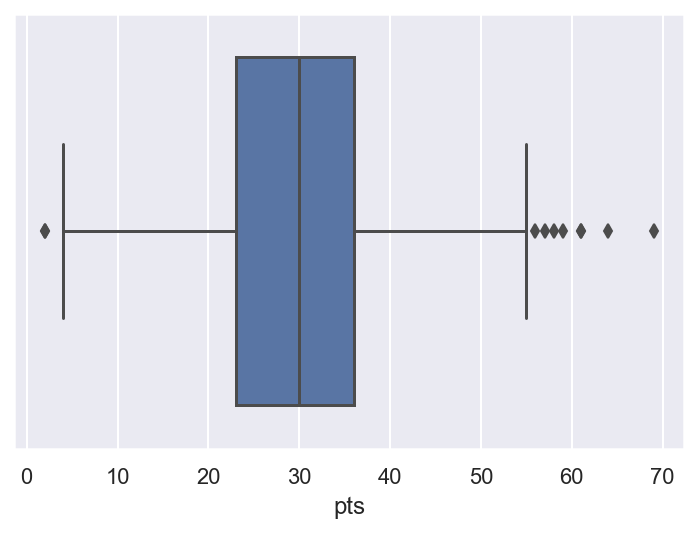

In [9]:
sns.boxplot(x=jordan_df['pts'])

[章回目錄](#章回目錄)

### 每場出手的命中率
#### 能轟30分的情況下，還可以讓投籃命中度維持在約50%

<AxesSubplot:xlabel='fgp'>

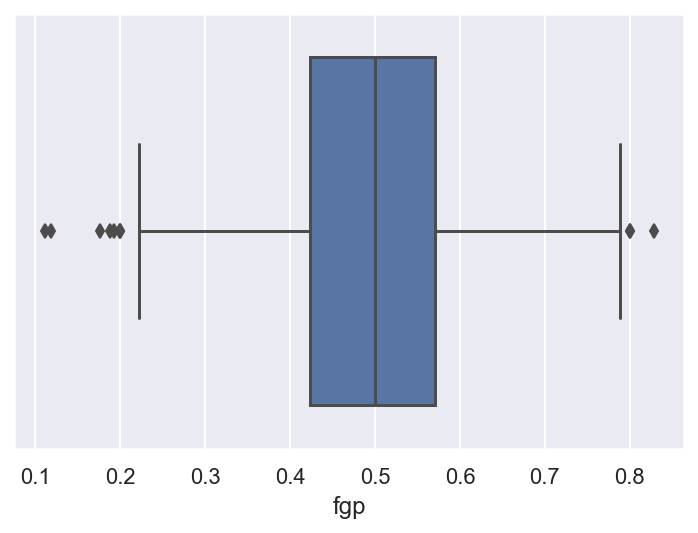

In [10]:
sns.boxplot(x=jordan_df['fgp'])

[章回目錄](#章回目錄)

### 看看Jordan各項數據的四分位距

In [11]:
Q1 = jordan_df.quantile(0.25)
Q3 = jordan_df.quantile(0.75)
IQR = Q3 - Q1
IQR=IQR.round()
IQR

fiel goal             5.0
fga                   8.0
fgp                   0.0
three                 1.0
threeatt              3.0
threep                0.0
ft                    6.0
fta                   6.0
free throw            0.0
offensive rebound     2.0
dffensive rebound     3.0
total rebound         4.0
assisst               4.0
stl                   2.0
blocks                1.0
turnovers             3.0
pts                  13.0
dtype: float64

[章回目錄](#章回目錄)

### 將離群值排除掉

In [12]:
jordan_df = jordan_df[~((jordan_df < (Q1 - 1.5 * IQR)) |(jordan_df > (Q3 + 1.5 * IQR))).any(axis=1)]
jordan_df.shape

D:\Anaconda\ana\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
D:\Anaconda\ana\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(283, 22)

### 排除離群值之後的四分位距圖

<AxesSubplot:xlabel='pts'>

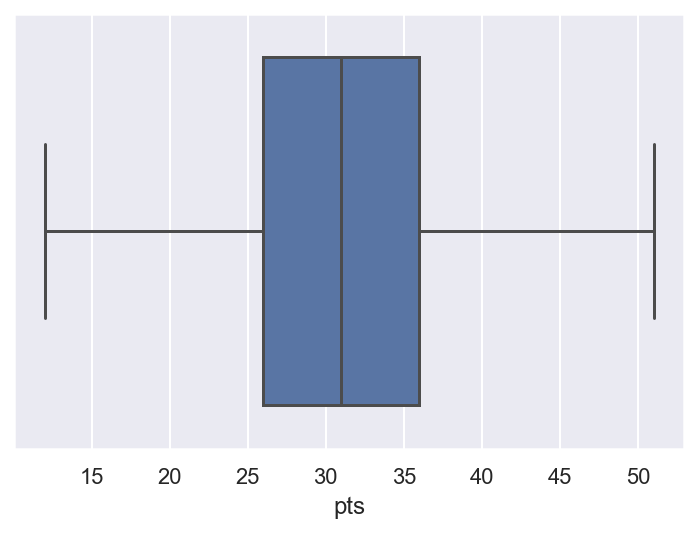

In [13]:
sns.boxplot(x=jordan_df['pts'])

### 查看Jordan各項數據之間的相關程度

,fiel goal,fga,fgp,three,threeatt,threep,ft,fta,free throw,offensive rebound,dffensive rebound,total rebound,assisst,stl,blocks,turnovers,pts
fiel goal,1.000000,0.931932,0.318037,-0.004206,0.183889,-0.016662,0.193500,0.203932,-0.093562,0.134972,0.056966,0.117169,-0.026166,0.199539,0.144376,-0.070856,0.869481
fga,0.931932,1.000000,-0.037451,0.026492,0.255791,0.007626,0.204978,0.213781,-0.067862,0.142436,0.088537,0.149090,-0.058557,0.186957,0.105102,-0.066784,0.824152
fgp,0.318037,-0.037451,1.000000,-0.064778,-0.151152,-0.050734,0.002444,0.010750,-0.099570,-0.028417,-0.080702,-0.086173,0.090133,0.078452,0.109692,-0.019016,0.243759
three,-0.004206,0.026492,-0.064778,1.000000,0.645695,0.969849,-0.049195,-0.052562,0.012179,-0.037457,0.061186,0.036406,0.099825,0.021760,0.011004,-0.060344,0.019434
threeatt,0.183889,0.255791,-0.151152,0.645695,1.000000,0.581220,-0.000404,0.008326,-0.034947,-0.027902,0.080380,0.058272,0.022727,0.035428,-0.069440,-0.113169,0.172445
threep,-0.016662,0.007626,-0.050734,0.969849,0.581220,1.000000,-0.044339,-0.047231,0.009218,-0.015547,0.071400,0.056291,0.108769,0.024680,0.021735,-0.060591,0.010829
ft,0.193500,0.204978,0.002444,-0.049195,-0.000404,-0.044339,1.000000,0.982451,-0.016910,0.068063,0.076835,0.102150,-0.002875,0.094497,0.043736,0.199462,0.650640
fta,0.203932,0.213781,0.010750,-0.052562,0.008326,-0.047231,0.982451,1.000000,-0.181189,0.071013,0.069383,0.096925,-0.017525,0.087328,0.038131,0.192518,0.649699
free throw,-0.093562,-0.067862,-0.099570,0.012179,-0.034947,0.009218,-0.016910,-0.181189,1.000000,-0.022755,0.080680,0.061064,0.053309,0.016791,0.067480,-0.014876,-0.080190
offensive rebound,0.134972,0.142436,-0.028417,-0.037457,-0.027902,-0.015547,0.068063,0.071013,-0.022755,1.000000,-0.047487,0.447787,0.023910,0.021110,0.187244,0.153063,0.136727


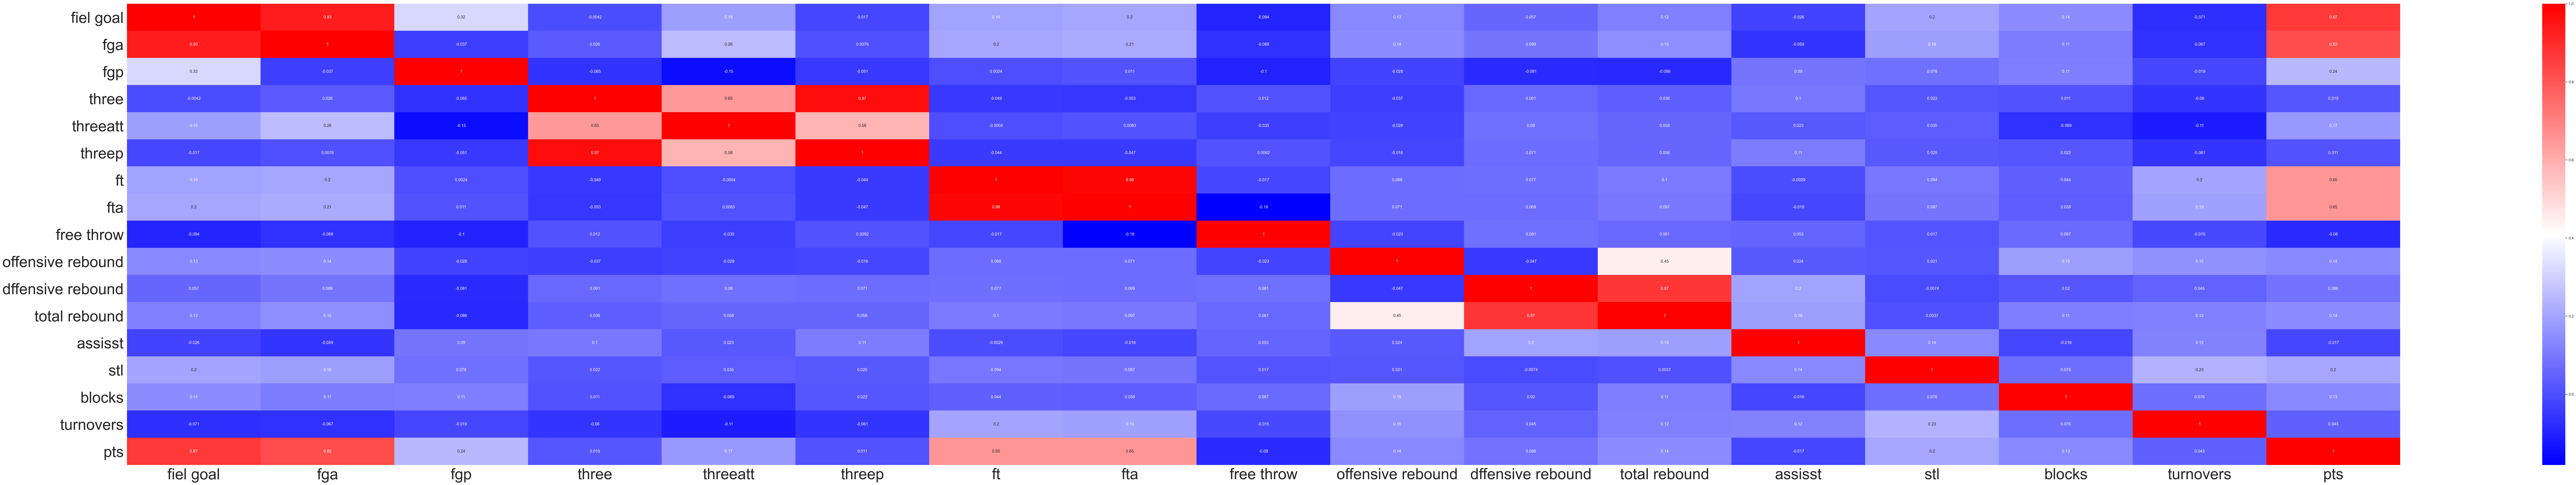

In [14]:
plt.figure(figsize=(150,25))
jordan_c= jordan_df.corr()
sns.heatmap(jordan_c,cmap="bwr",annot=True)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
jordan_c

由於投籃命中率，是從投籃次數，投籃命中數計算而來，故其相關性較高，而罰球命中率、三分命中率，總籃板數，這些皆由其他數據計算而來，故其相關性都和他們計算的屬性的相關性較高

[章回目錄](#章回目錄)

### 年紀是否會影響Jordan的投籃命中率
#### 年紀愈大，0.5%以下的藍點較密集，但整體而言仍是穩定的

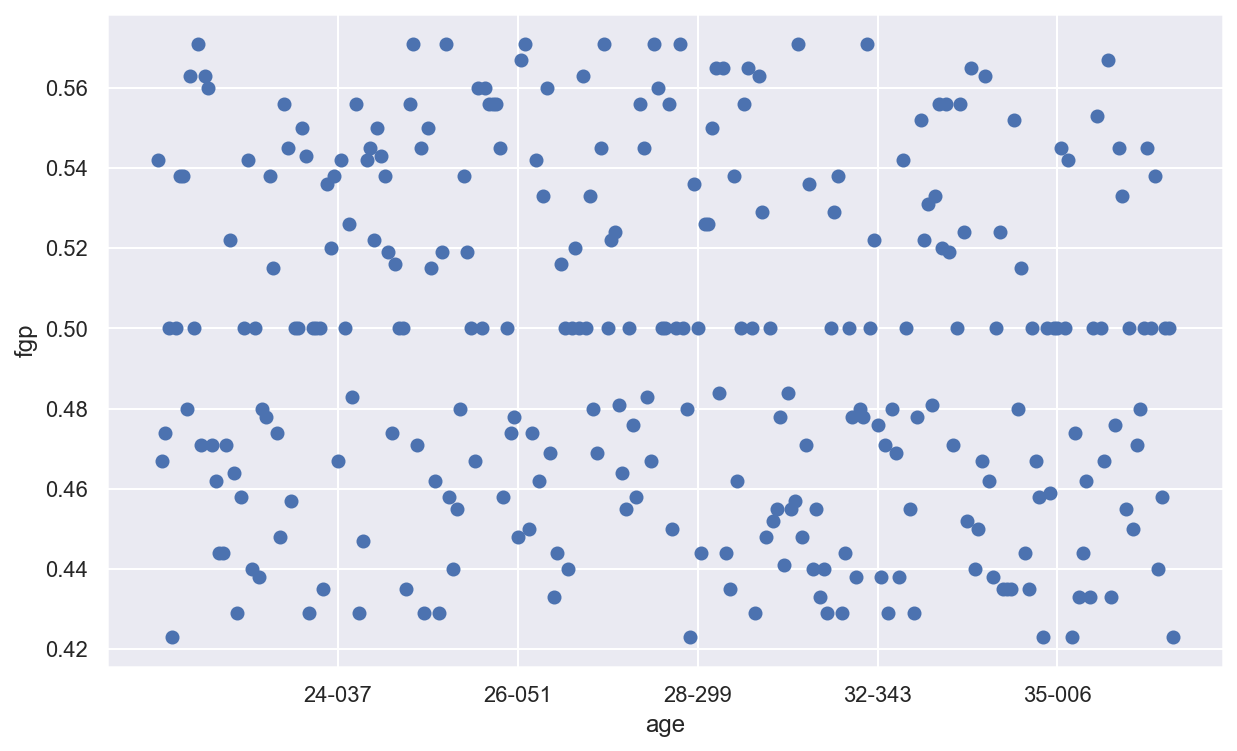

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(jordan_df['age'], jordan_df['fgp'])
ax.set_xlabel('age')
ax.set_ylabel('fgp')
ax.set_xticks([50,100,150,200,250])
plt.show()

[章回目錄](#章回目錄)

## 年紀是否會影響Jordan的得分
#### 從圖中可以看出24歲，每個點都在25分以上，多數在35分以上，28歲整體來看是低谷，32歲左右稍微回溫，再後面點點散布較廣，每場得分較之前不穩定

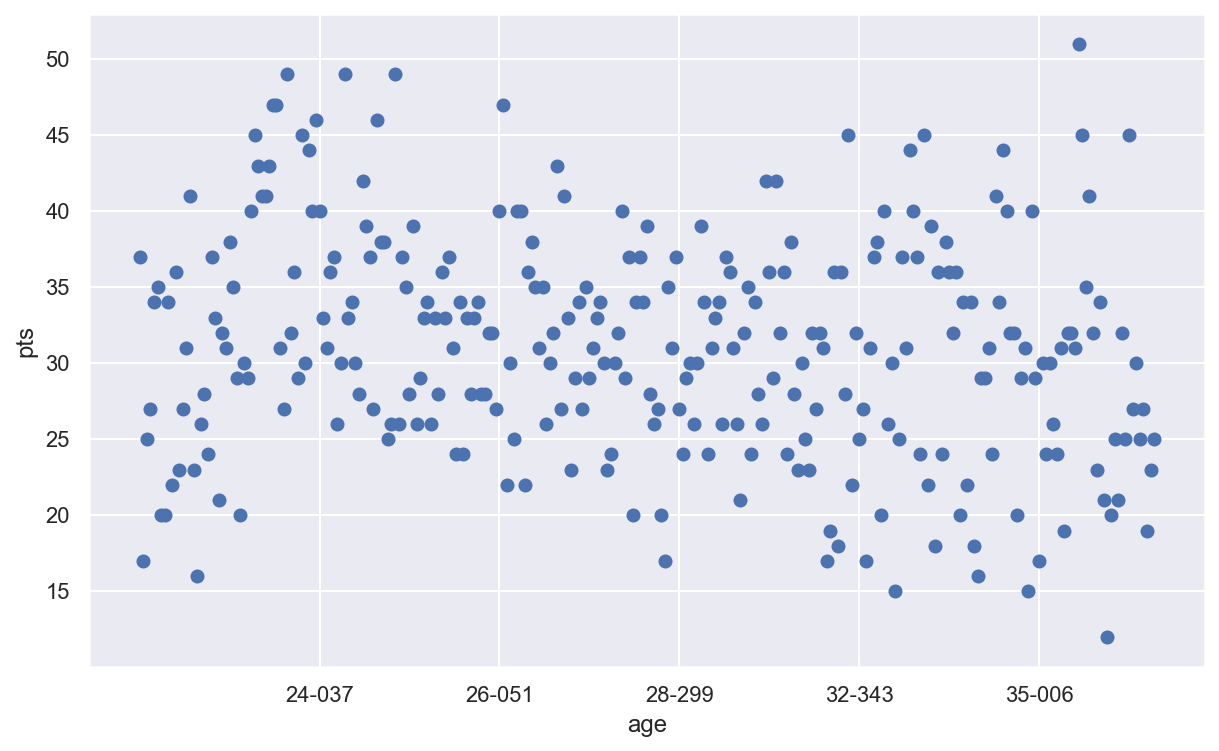

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(jordan_df['age'], jordan_df['pts'])
ax.set_xlabel('age')
ax.set_ylabel('pts')
ax.set_xticks([50,100,150,200,250])
plt.show()

[章回目錄](#章回目錄)

# Lebron的資料分析

<img src='./image/04.jpg'>

### 引入Lebron的比賽數據

In [17]:
csv_file=pd.read_csv('lebron_career.csv')
lebron_df=pd.DataFrame(csv_file)
#print(lebron_df)
lebron_df.head(5)

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
0,1,2003-10-29,18-303,CLE,SAC,L (-14),42:00,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
1,2,2003-10-30,18-304,CLE,PHO,L (-9),41:00,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2,3,2003-11-01,18-306,CLE,POR,L (-19),39:00,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
3,4,2003-11-05,18-310,CLE,DEN,L (-4),41:00,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
4,5,2003-11-07,18-312,CLE,IND,L (-1),44:00,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7


[章回目錄](#章回目錄)

### 捨棄用不到的columns

In [18]:
lebron_df=lebron_df.drop(['game','date','game_score','minus_plus'], axis=1)  
lebron_df.head(5)

,age,team,opp,result,mp,fg,fga,fgp,three,threeatt,...,fta,ftp,orb,drb,trb,ast,stl,blk,tov,pts
0,18-303,CLE,SAC,L (-14),42:00,12,20,0.600,0,2,...,3,0.333,2,4,6,9,4,0,2,25
1,18-304,CLE,PHO,L (-9),41:00,8,17,0.471,1,5,...,7,0.571,2,10,12,8,1,0,7,21
2,18-306,CLE,POR,L (-19),39:00,3,12,0.250,0,1,...,2,1.000,0,4,4,6,2,0,2,8
3,18-310,CLE,DEN,L (-4),41:00,3,11,0.273,0,2,...,1,1.000,2,9,11,7,2,3,2,7
4,18-312,CLE,IND,L (-1),44:00,8,18,0.444,1,2,...,7,0.857,0,5,5,3,0,0,7,23


[章回目錄](#章回目錄)

### 把columns的名稱改一下

In [19]:
lebron_df=lebron_df.rename(columns={'opp':'opponent', 'mp':'minutes', 'fg':'fiel goal',
                                 'orb':'offensive rebound', 'drb':'dffensive rebound', 'trb':'total rebound', 
                                'ast':'assisst', 'blk':'blocks', 'tov':'turnovers', 'ftp':'free throw'})
lebron_df.head(5)

,age,team,opponent,result,minutes,fiel goal,fga,fgp,three,threeatt,...,fta,free throw,offensive rebound,dffensive rebound,total rebound,assisst,stl,blocks,turnovers,pts
0,18-303,CLE,SAC,L (-14),42:00,12,20,0.600,0,2,...,3,0.333,2,4,6,9,4,0,2,25
1,18-304,CLE,PHO,L (-9),41:00,8,17,0.471,1,5,...,7,0.571,2,10,12,8,1,0,7,21
2,18-306,CLE,POR,L (-19),39:00,3,12,0.250,0,1,...,2,1.000,0,4,4,6,2,0,2,8
3,18-310,CLE,DEN,L (-4),41:00,3,11,0.273,0,2,...,1,1.000,2,9,11,7,2,3,2,7
4,18-312,CLE,IND,L (-1),44:00,8,18,0.444,1,2,...,7,0.857,0,5,5,3,0,0,7,23


[章回目錄](#章回目錄)

### 看一下DataFrame的大小，以及是否有重複的資料

In [20]:
print("Jordan DataFrame 大小",lebron_df.shape)

duplicate_rows_lebron_df = lebron_df[lebron_df.duplicated()]  #多少列重複
print("重複的列數: ", duplicate_rows_lebron_df.shape) 

Jordan DataFrame 大小 (1132, 22)
重複的列數:  (0, 22)


### 檢查是否有缺失值

In [21]:
lebron_df.count()

age                  1132
team                 1132
opponent             1132
result               1132
minutes              1132
fiel goal            1132
fga                  1132
fgp                  1132
three                1132
threeatt             1132
threep               1092
ft                   1132
fta                  1132
free throw           1120
offensive rebound    1132
dffensive rebound    1132
total rebound        1132
assisst              1132
stl                  1132
blocks               1132
turnovers            1132
pts                  1132
dtype: int64

## 將NaN補0

In [22]:
lebron_df['threep']=lebron_df['threep'].fillna(0) #nan用0取代
lebron_df['free throw']=lebron_df['free throw'].fillna(0)
lebron_df['threep'].head(10)

0    0.0
1    0.2
2    0.0
3    0.0
4    0.5
5    0.0
6    1.0
7    0.4
8    0.5
9    0.0
Name: threep, dtype: float64

[章回目錄](#章回目錄)

## 再檢查看看使否有缺失值

In [23]:
lebron_df.count()

age                  1132
team                 1132
opponent             1132
result               1132
minutes              1132
fiel goal            1132
fga                  1132
fgp                  1132
three                1132
threeatt             1132
threep               1132
ft                   1132
fta                  1132
free throw           1132
offensive rebound    1132
dffensive rebound    1132
total rebound        1132
assisst              1132
stl                  1132
blocks               1132
turnovers            1132
pts                  1132
dtype: int64

## Lebron的得分狀況

<AxesSubplot:xlabel='pts'>

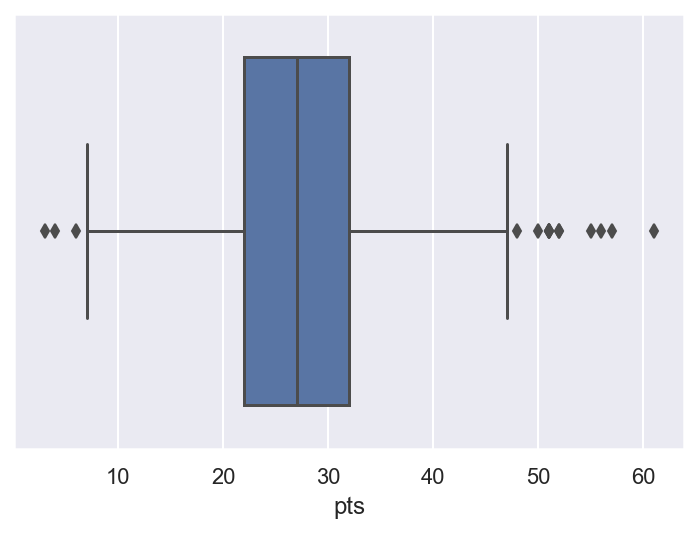

In [24]:
sns.boxplot(x=lebron_df['pts'])

[章回目錄](#章回目錄)

## Lebron的出手命中率，看是否有濫投的情況

<AxesSubplot:xlabel='fgp'>

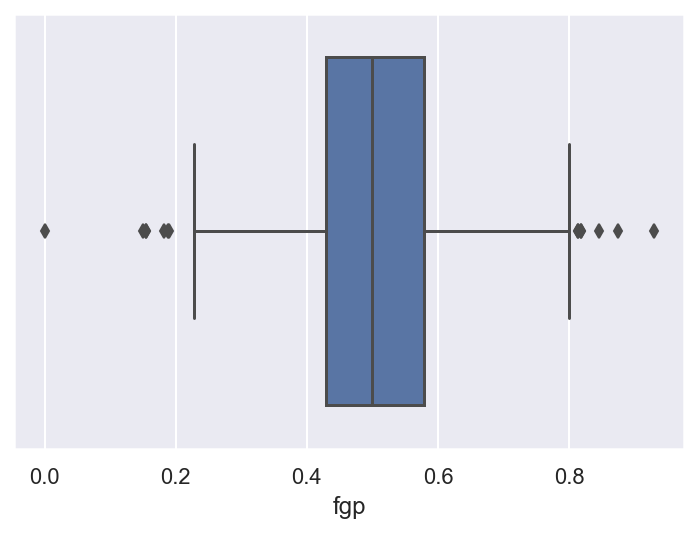

In [25]:
sns.boxplot(x=lebron_df['fgp'])

[章回目錄](#章回目錄)

## Lebron的四分位距

In [26]:
Q1 = lebron_df.quantile(0.25)
Q3 = lebron_df.quantile(0.75)
IQR = Q3 - Q1
IQR=IQR.round()
IQR

fiel goal             4.0
fga                   7.0
fgp                   0.0
three                 2.0
threeatt              3.0
threep                0.0
ft                    4.0
fta                   6.0
free throw            0.0
offensive rebound     2.0
dffensive rebound     4.0
total rebound         4.0
assisst               4.0
stl                   1.0
blocks                1.0
turnovers             3.0
pts                  10.0
dtype: float64

[章回目錄](#章回目錄)

## 排除掉離群值

In [27]:
lebron_df = lebron_df[~((lebron_df < (Q1 - 1.5 * IQR)) |(lebron_df > (Q3 + 1.5 * IQR))).any(axis=1)]
lebron_df.shape

D:\Anaconda\ana\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
D:\Anaconda\ana\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(215, 22)

[章回目錄](#章回目錄)

### 查看Lebron各項數據之間的相關性

,fiel goal,fga,fgp,three,threeatt,threep,ft,fta,free throw,offensive rebound,dffensive rebound,total rebound,assisst,stl,blocks,turnovers,pts
fiel goal,1.000000,0.930530,0.296746,0.248194,0.313283,0.155766,0.014289,0.044031,-0.110504,0.263086,0.066472,0.159282,0.031932,0.078395,0.045780,0.124555,0.875191
fga,0.930530,1.000000,-0.064840,0.255850,0.381325,0.129500,0.039682,0.081833,-0.145939,0.216149,0.071976,0.145944,-0.000404,0.054046,0.065627,0.130700,0.831053
fgp,0.296746,-0.064840,1.000000,0.017245,-0.133209,0.096617,-0.050617,-0.080594,0.089361,0.139581,-0.022659,0.034200,0.062429,0.078308,-0.055634,-0.011841,0.224201
three,0.248194,0.255850,0.017245,1.000000,0.736294,0.828572,-0.029100,-0.026345,-0.023220,0.044073,0.024301,0.038117,-0.007233,-0.019355,0.013666,0.135519,0.378172
threeatt,0.313283,0.381325,-0.133209,0.736294,1.000000,0.380662,-0.000692,0.026888,-0.121823,0.031925,0.101810,0.100743,-0.011401,-0.027726,0.016407,0.211605,0.395202
threep,0.155766,0.129500,0.096617,0.828572,0.380662,1.000000,0.015268,0.000340,0.052286,0.072678,0.021815,0.047000,0.006267,-0.004791,0.051777,0.115923,0.290235
ft,0.014289,0.039682,-0.050617,-0.029100,-0.000692,0.015268,1.000000,0.962478,0.228937,-0.059087,0.023819,-0.002122,-0.020298,0.037021,0.092674,-0.036409,0.460951
fta,0.044031,0.081833,-0.080594,-0.026345,0.026888,0.000340,0.962478,1.000000,-0.027982,-0.025110,0.054588,0.037716,-0.024779,0.013800,0.115805,-0.015256,0.468861
free throw,-0.110504,-0.145939,0.089361,-0.023220,-0.121823,0.052286,0.228937,-0.027982,1.000000,-0.146097,-0.082380,-0.127939,0.007422,0.064332,-0.056400,-0.135443,0.008881
offensive rebound,0.263086,0.216149,0.139581,0.044073,0.031925,0.072678,-0.059087,-0.025110,-0.146097,1.000000,0.144297,0.511325,0.141712,0.027931,0.001068,0.097451,0.197701


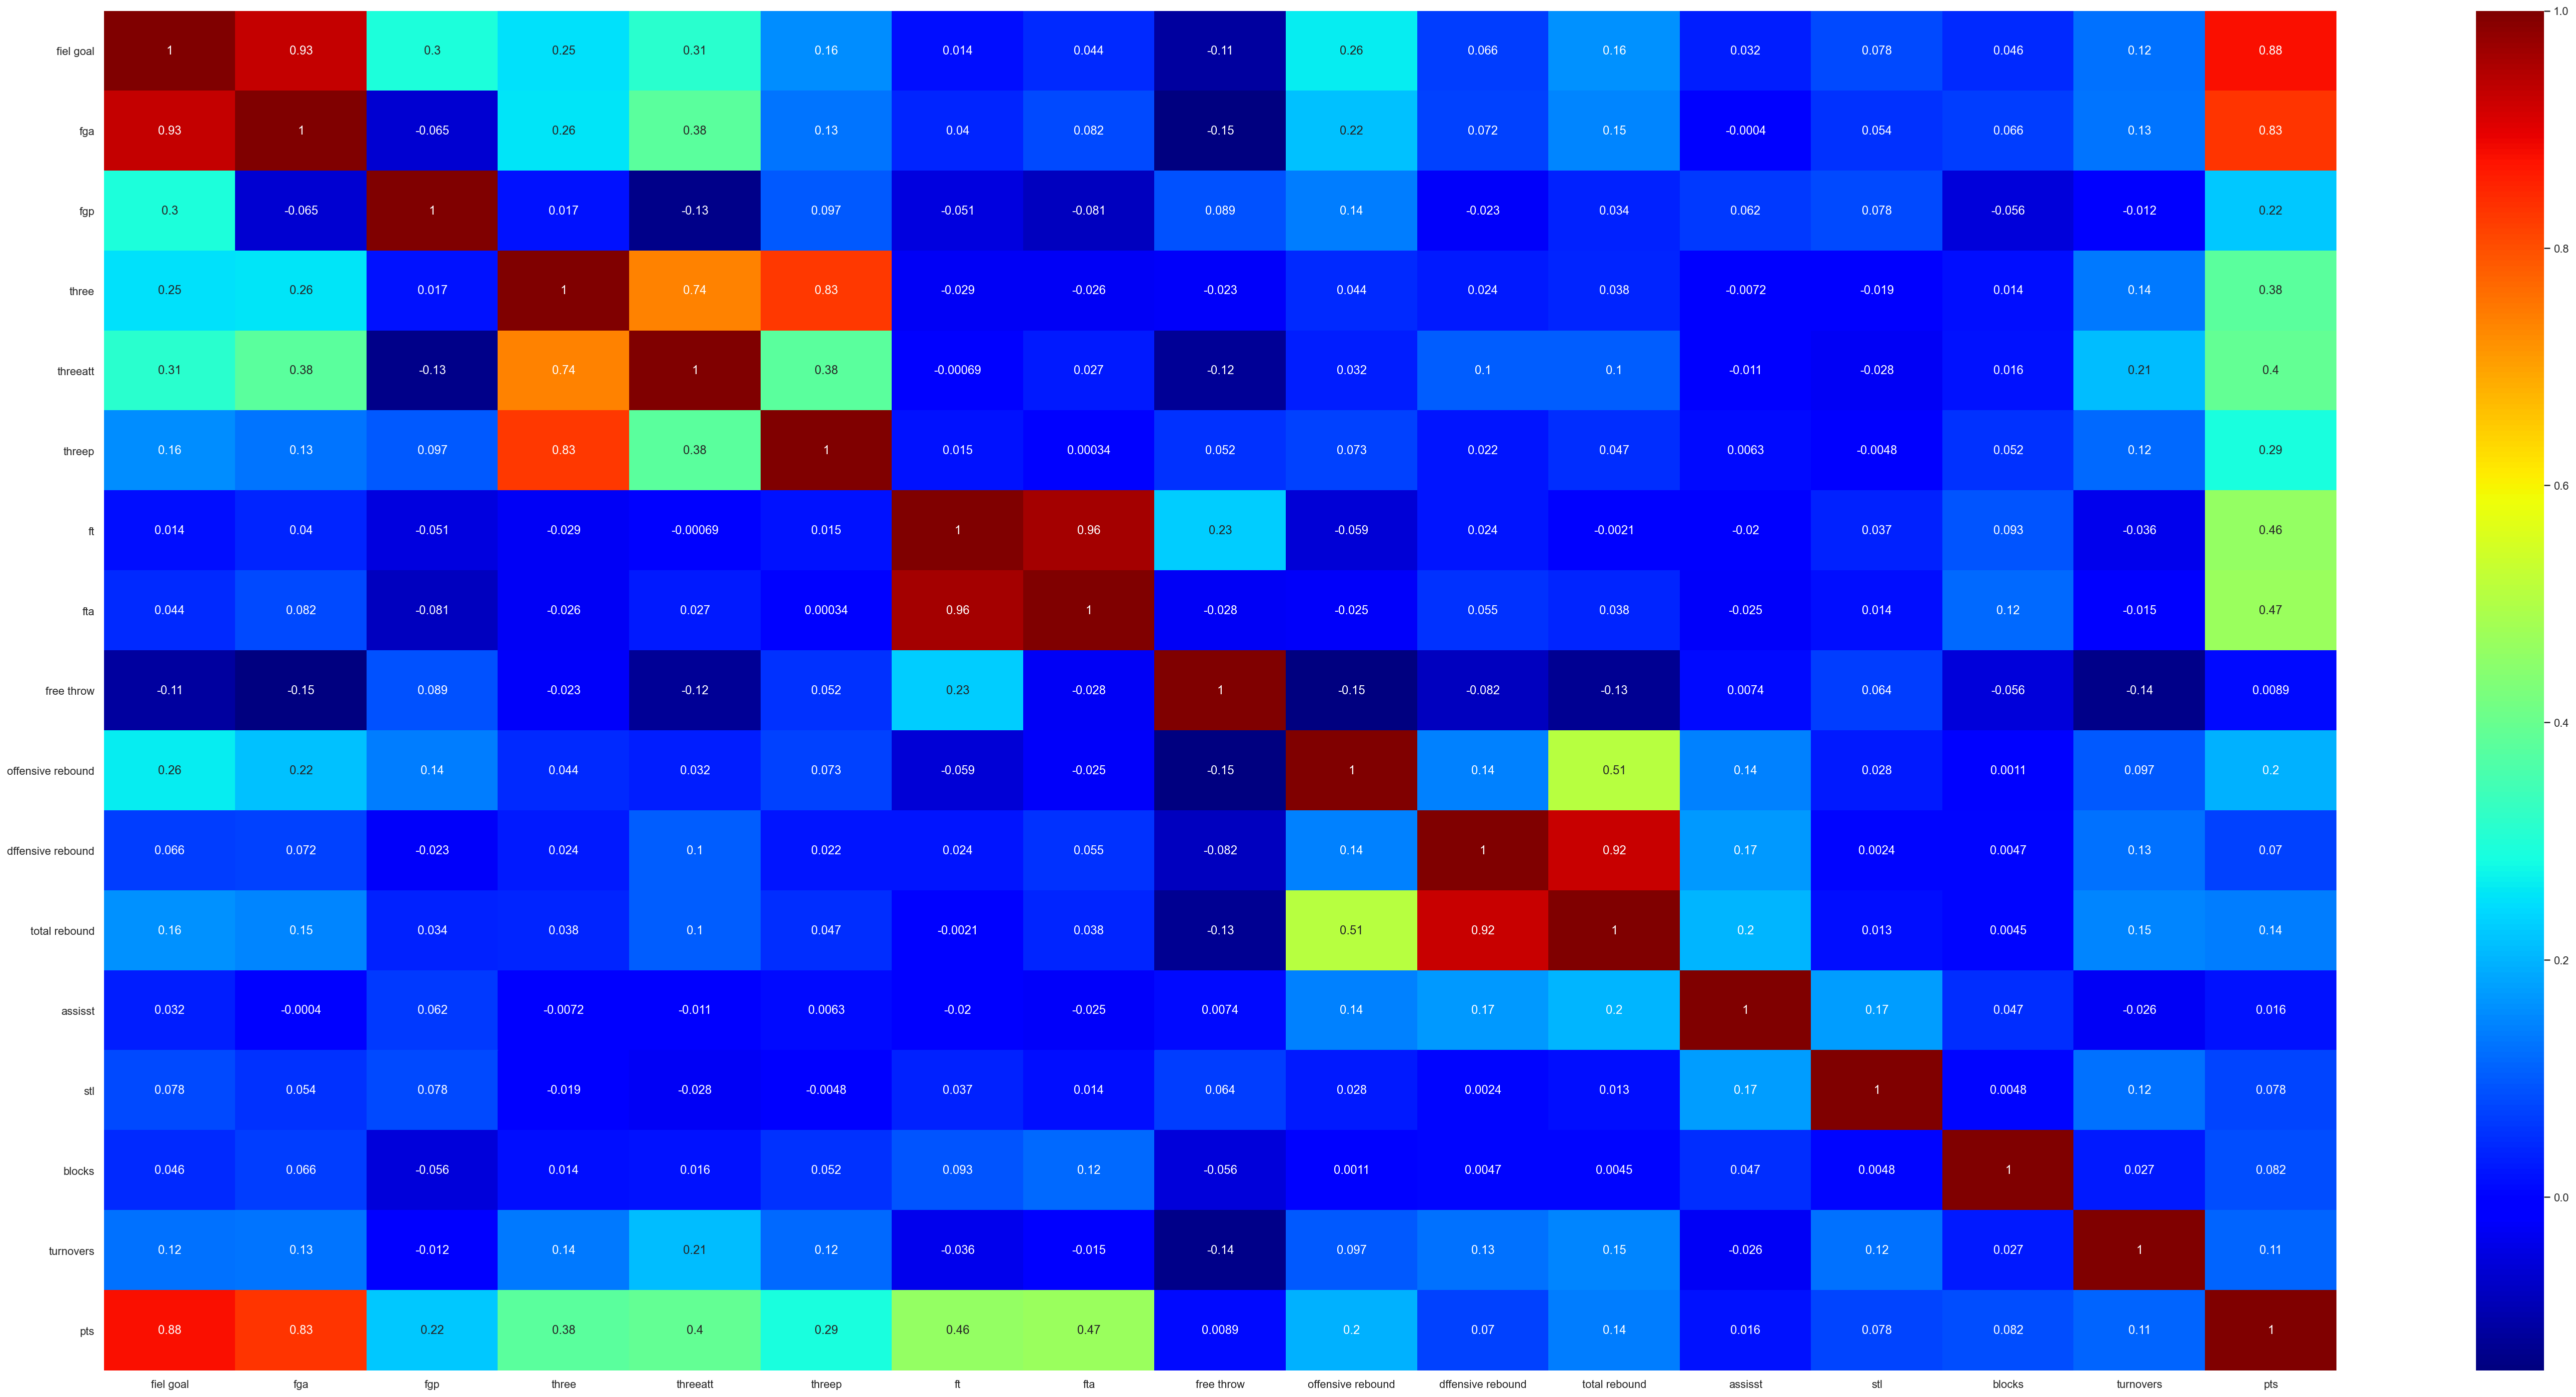

In [28]:
plt.figure(figsize=(50,25))
lebron_c= lebron_df.corr()
sns.heatmap(lebron_c,cmap="jet",annot=True)
lebron_c

[章回目錄](#章回目錄)

## 年紀是否會影響Lebron的投籃命中率

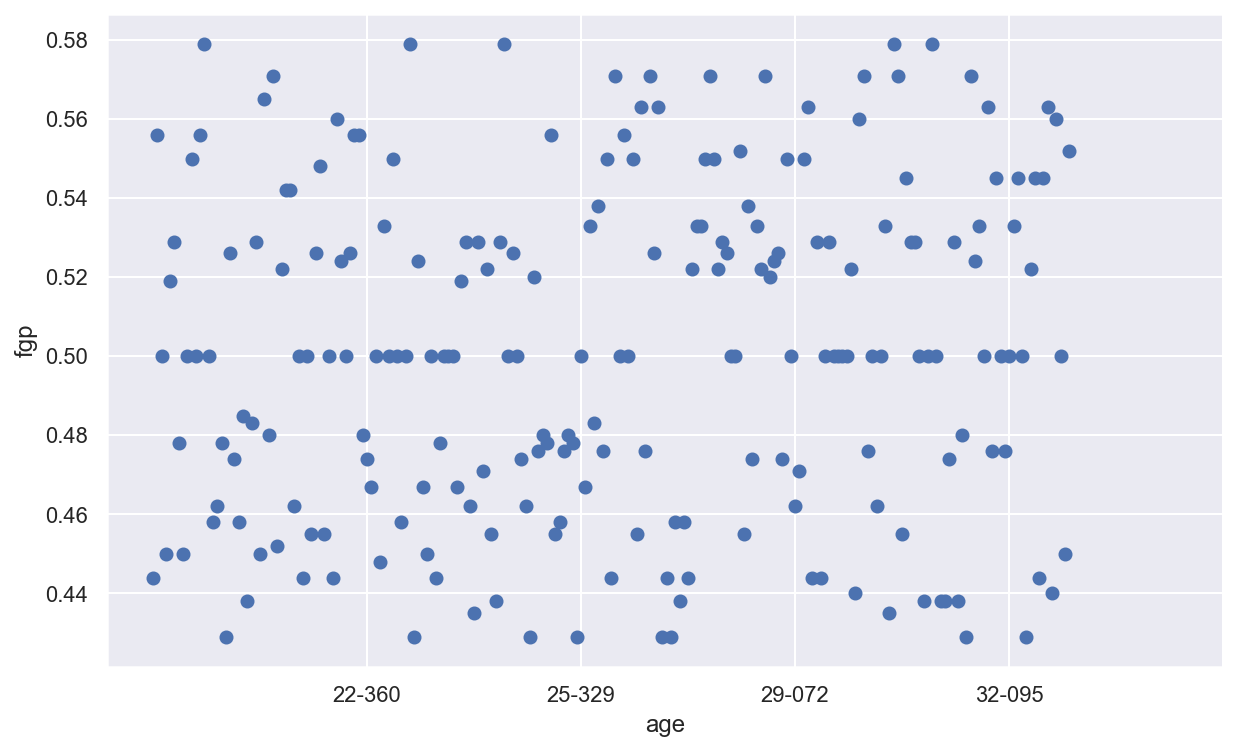

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(lebron_df['age'], lebron_df['fgp'])
ax.set_xlabel('age')
ax.set_ylabel('fgp')
ax.set_xticks([50,100,150,200,250])
plt.show()

[章回目錄](#章回目錄)

## 年紀是否會影響Lebron的得分狀況
### 較無回溫的趨勢，仍是緩慢的減少

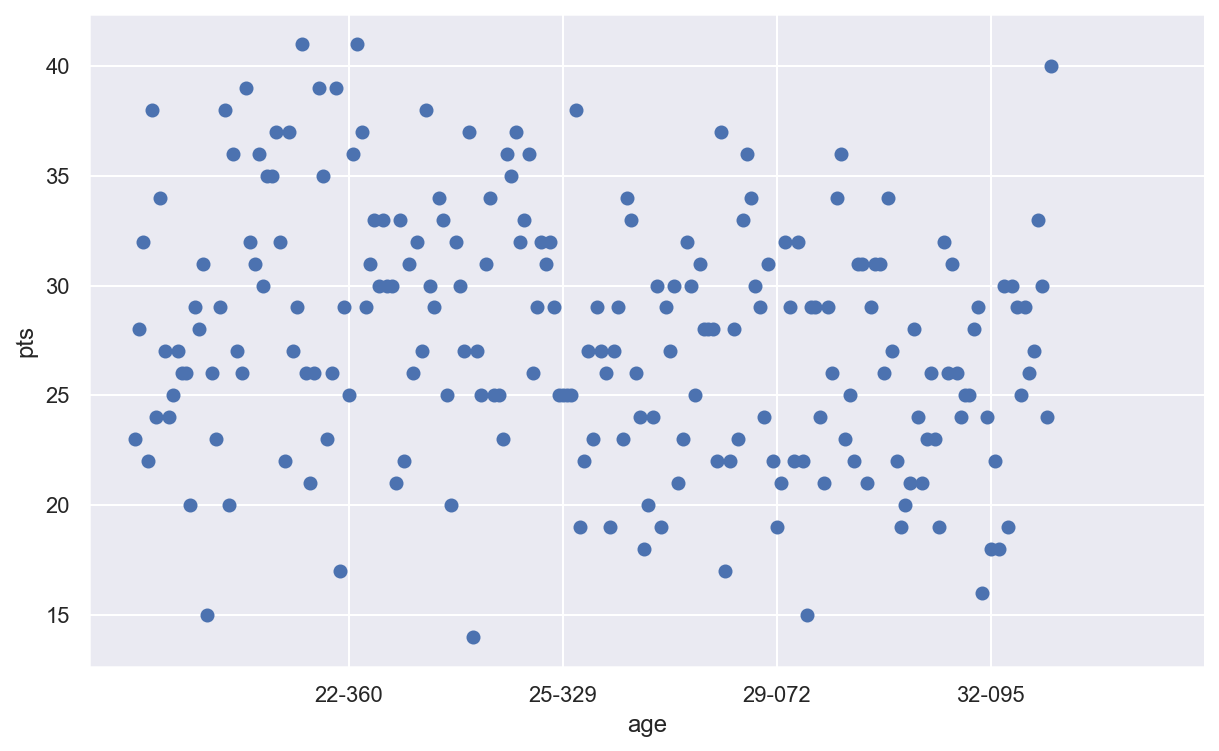

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(lebron_df['age'], lebron_df['pts'])
ax.set_xlabel('age')
ax.set_ylabel('pts')
ax.set_xticks([50,100,150,200,250])
plt.show()

[章回目錄](#章回目錄)

# 比較Jordan和Lebron的資料

<img src='./image/05.jpg'/>

### 重新輸入Jordan和Lebron的數據，未經過離群值的排除

In [31]:
csv_file=pd.read_csv('jordan_career.csv')
jordan_df=pd.DataFrame(csv_file)

jordan_df['threep']=jordan_df['threep'].fillna(0) #nan用0取代
jordan_df['ft']=jordan_df['ft'].fillna(0)

print("Jordan: ")
jordan_df.sample(5)

Jordan: 


,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
763,80,1996-04-18,33-061,CHI,DET,W (+31),24:00,11,18,0.611,...,1,4,5,1,1,0,2,30,23.0,NaN
103,4,1986-11-07,23-263,CHI,DET,L (-6),42:00,11,26,0.423,...,0,0,0,5,1,1,3,33,18.2,NaN
419,75,1990-04-11,27-053,CHI,CLE,W (+21),31:00,9,15,0.600,...,1,4,5,7,3,1,2,22,21.2,NaN
503,77,1991-04-10,28-052,CHI,IND,W (+5),41:00,12,21,0.571,...,0,5,5,4,0,1,2,28,19.1,NaN
25,26,1984-12-15,21-302,CHI,PHI,L (-12),27:00,7,16,0.438,...,1,1,2,2,1,0,1,14,7.2,NaN


In [32]:
csv_file=pd.read_csv('lebron_career.csv')
lebron_df=pd.DataFrame(csv_file)

lebron_df['threep']=lebron_df['threep'].fillna(0) #nan用0取代
lebron_df['ft']=lebron_df['ft'].fillna(0)

print("Lebron: ")
lebron_df.sample(5)

Lebron: 


,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
57,58,2004-03-03,19-064,CLE,ATL,W (+32),28:00,9,17,0.529,...,1,6,7,3,1,1,1,24,20.6,22
6,7,2003-11-10,18-315,CLE,NYK,W (+14),34:00,7,12,0.583,...,1,4,5,4,1,1,2,17,15.8,20
42,43,2004-01-30,19-031,CLE,MIL,L (-6),37:00,7,25,0.280,...,2,6,8,3,1,0,5,20,3.4,3
94,16,2004-12-02,19-338,CLE,DEN,W (+19),41:00,8,17,0.471,...,1,7,8,9,2,1,5,17,13.5,23
202,44,2006-02-01,21-033,CLE,NJN,W (+6),44:26,8,21,0.381,...,0,11,11,10,1,1,4,26,20.9,5


# Jordan與Lebron的各項數據的平均

In [33]:
jordan_mean=jordan_df.mean()
lebron_mean=lebron_df.mean()

print("Jordan 的各項數據平均 :\n",jordan_mean)
print("\nLebron 的各項數據平均 :\n",lebron_mean)

Jordan 的各項數據平均 :
 game          39.573694
fg            11.373134
fga           22.888993
fgp            0.495741
three          0.541978
threeatt       1.658582
threep         0.188906
ft             6.834888
fta            8.182836
ftp            0.828564
orb            1.555970
drb            4.667910
trb            6.223881
ast            5.254664
stl            2.345149
blk            0.833022
tov            2.727612
pts           30.123134
game_score    23.440951
minus_plus          NaN
dtype: float64

Lebron 的各項數據平均 :
 game          38.385159
fg             9.866608
fga           19.585689
fgp            0.505467
three          1.409894
threeatt       4.103357
threep         0.298338
ft             6.005300
fta            8.126325
ftp            0.734154
orb            1.212898
drb            6.136926
trb            7.349823
ast            7.163428
stl            1.640459
blk            0.782686
tov            3.463781
pts           27.148410
game_score    22.224735
minus_plus  

# 將Jordan的平均數據，以長條圖的方式表現

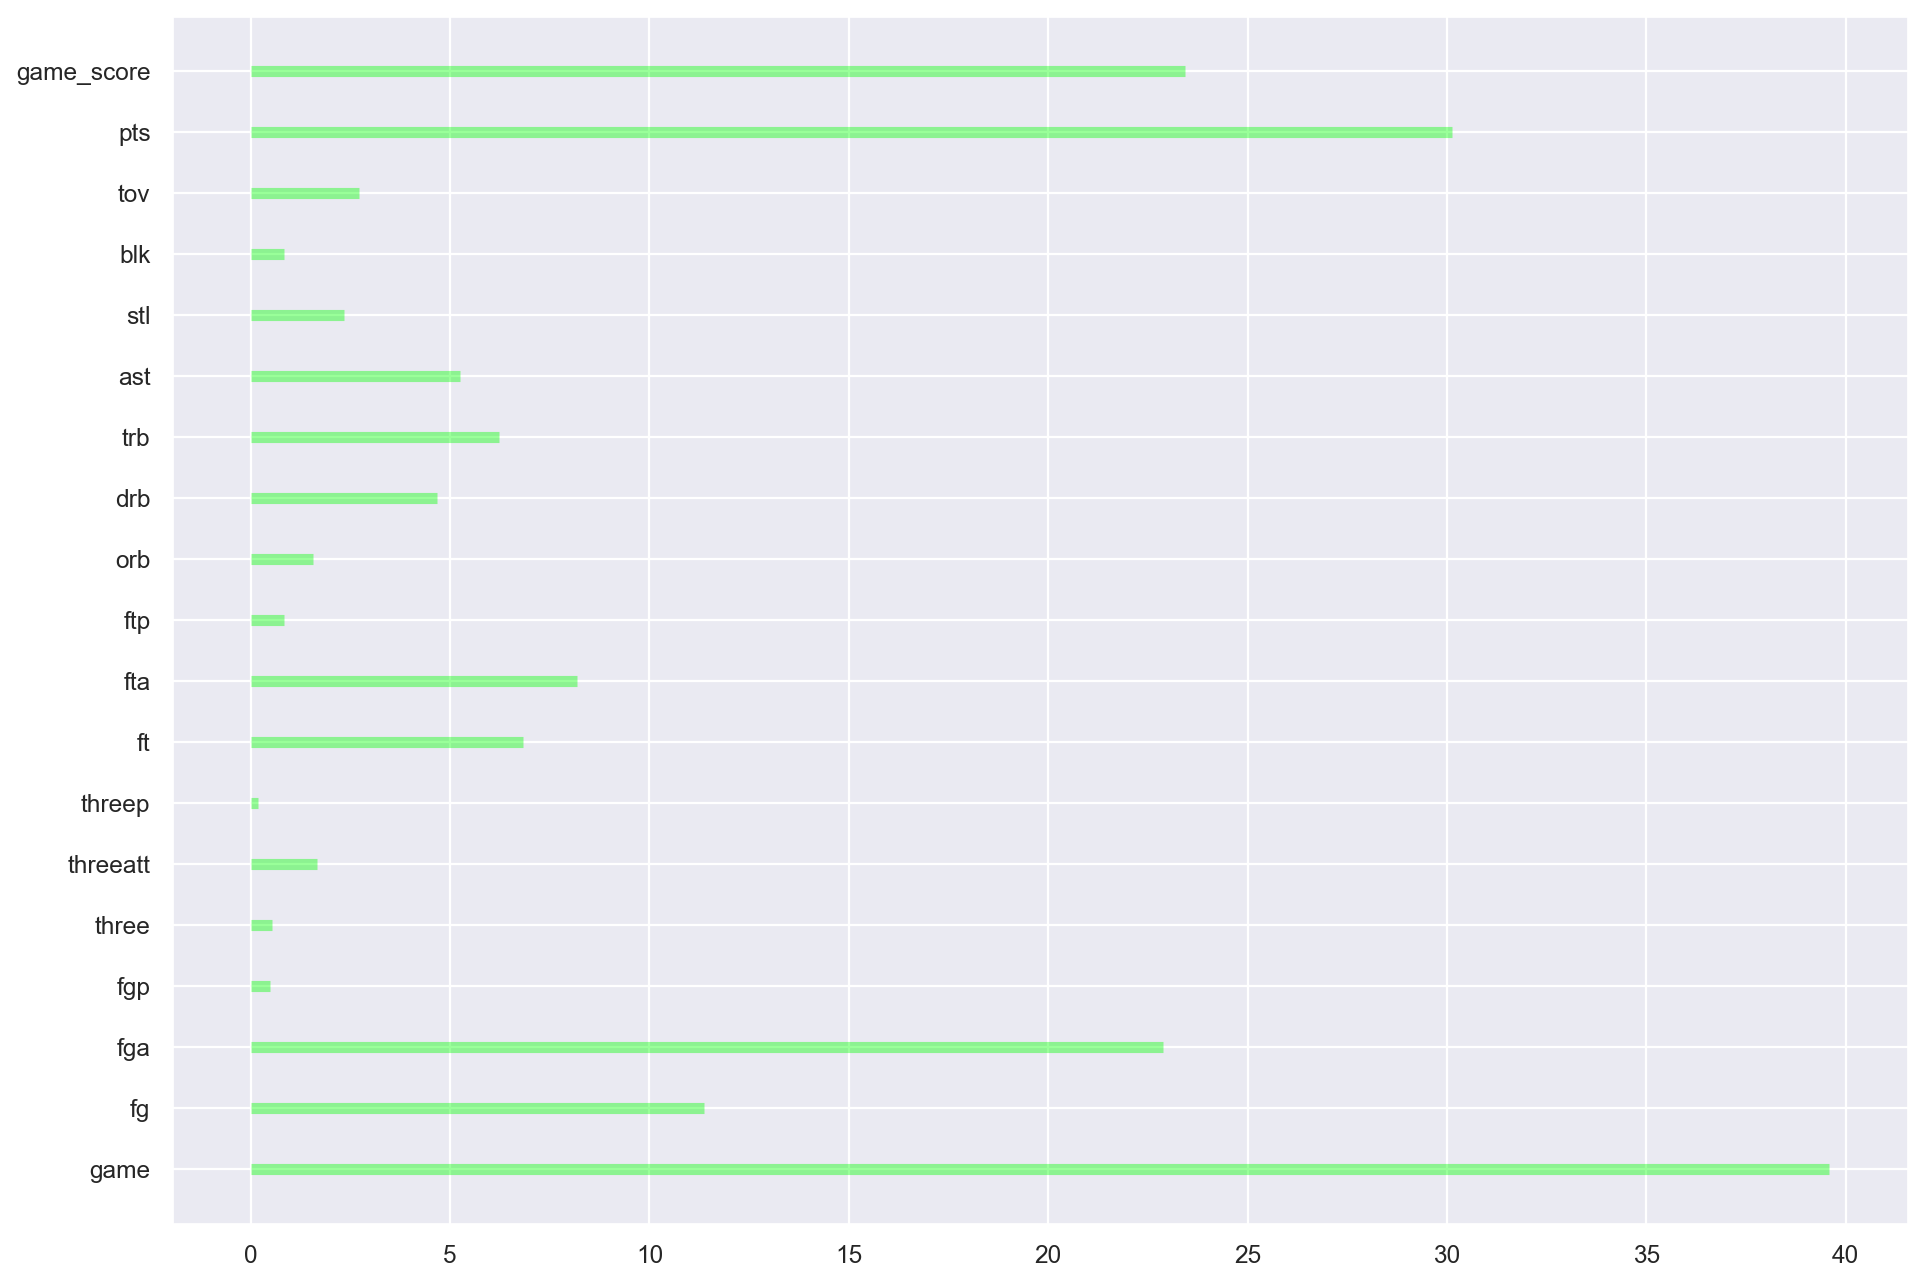

In [34]:
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=jordan_mean.index, xmin=0, xmax=jordan_mean, colors='lime', alpha=0.4, linewidth=5)

[章回目錄](#章回目錄)

# 將Lebron的平均數據，以長條圖的方式表現

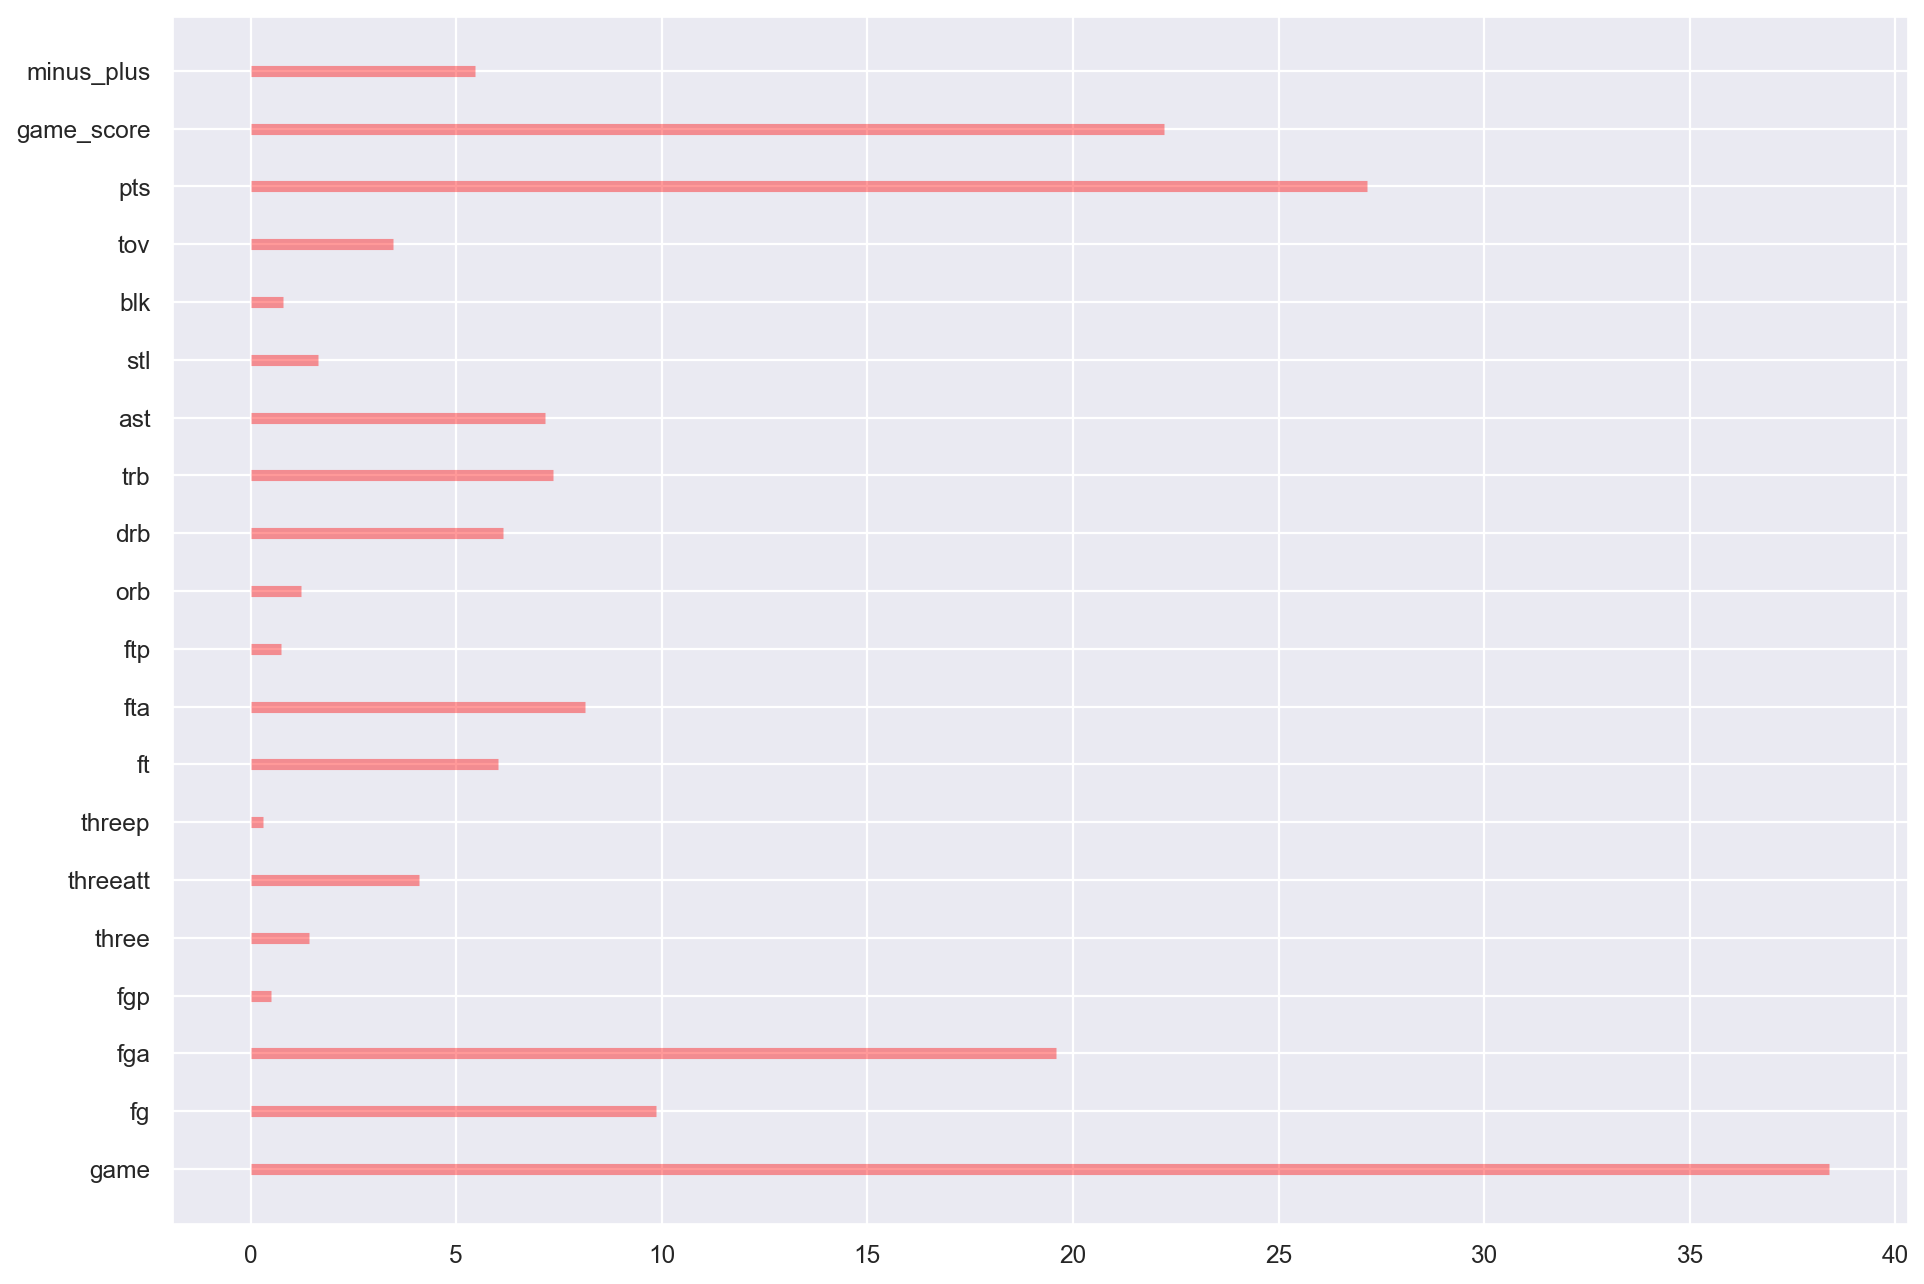

In [35]:
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=lebron_mean.index, xmin=0, xmax=lebron_mean, colors='red', alpha=0.4, linewidth=5)

[章回目錄](#章回目錄)

# Jordan和 Lebron各項平均數距的差異

In [36]:
diff_mean=jordan_mean-lebron_mean
diff_mean

game          1.188535
fg            1.506527
fga           3.303303
fgp          -0.009727
three        -0.867916
threeatt     -2.444775
threep       -0.109433
ft            0.829588
fta           0.056511
ftp           0.094411
orb           0.343073
drb          -1.469015
trb          -1.125943
ast          -1.908763
stl           0.704690
blk           0.050337
tov          -0.736169
pts           2.974724
game_score    1.216217
minus_plus         NaN
dtype: float64

[章回目錄](#章回目錄)

## 三分線得分差異

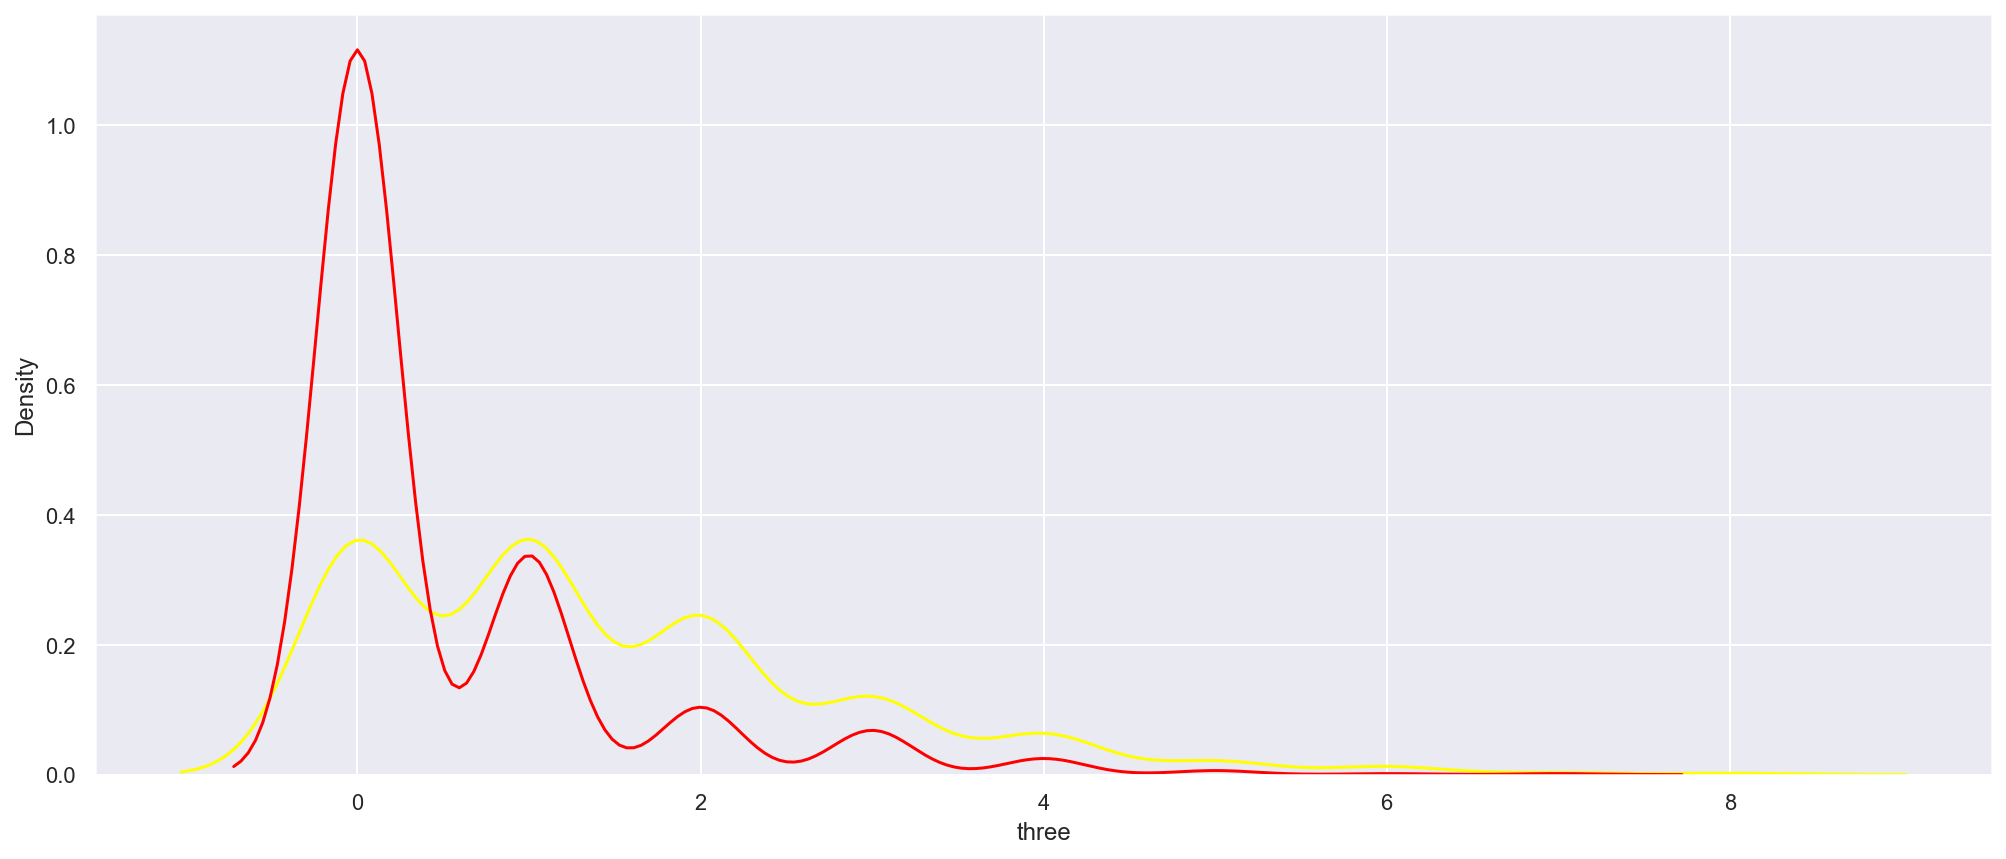

In [37]:
fig, ax = plt.subplots(figsize=(17, 7))

sns.kdeplot(lebron_df.three, shade=False, color='yellow', label='Jordan', cbar=True);
sns.kdeplot(jordan_df.three, shade=False, color='red' ,label='LeBron', cbar=True);

與各自的時空背景有很大的關係，Jordan時代是屬於禁區拚搏的時代，得分通常會深深入敵營，經過強烈的肌肉碰撞之後得分。
到了Lebron時代末期，防守較沒有以往嚴密，且崇尚漂亮的得分，規則開始約束防守者，使進攻方較有餘裕，而迎來了大量的三分球時代。

[章回目錄](#章回目錄)

# 比較兩人2分球的得分狀況

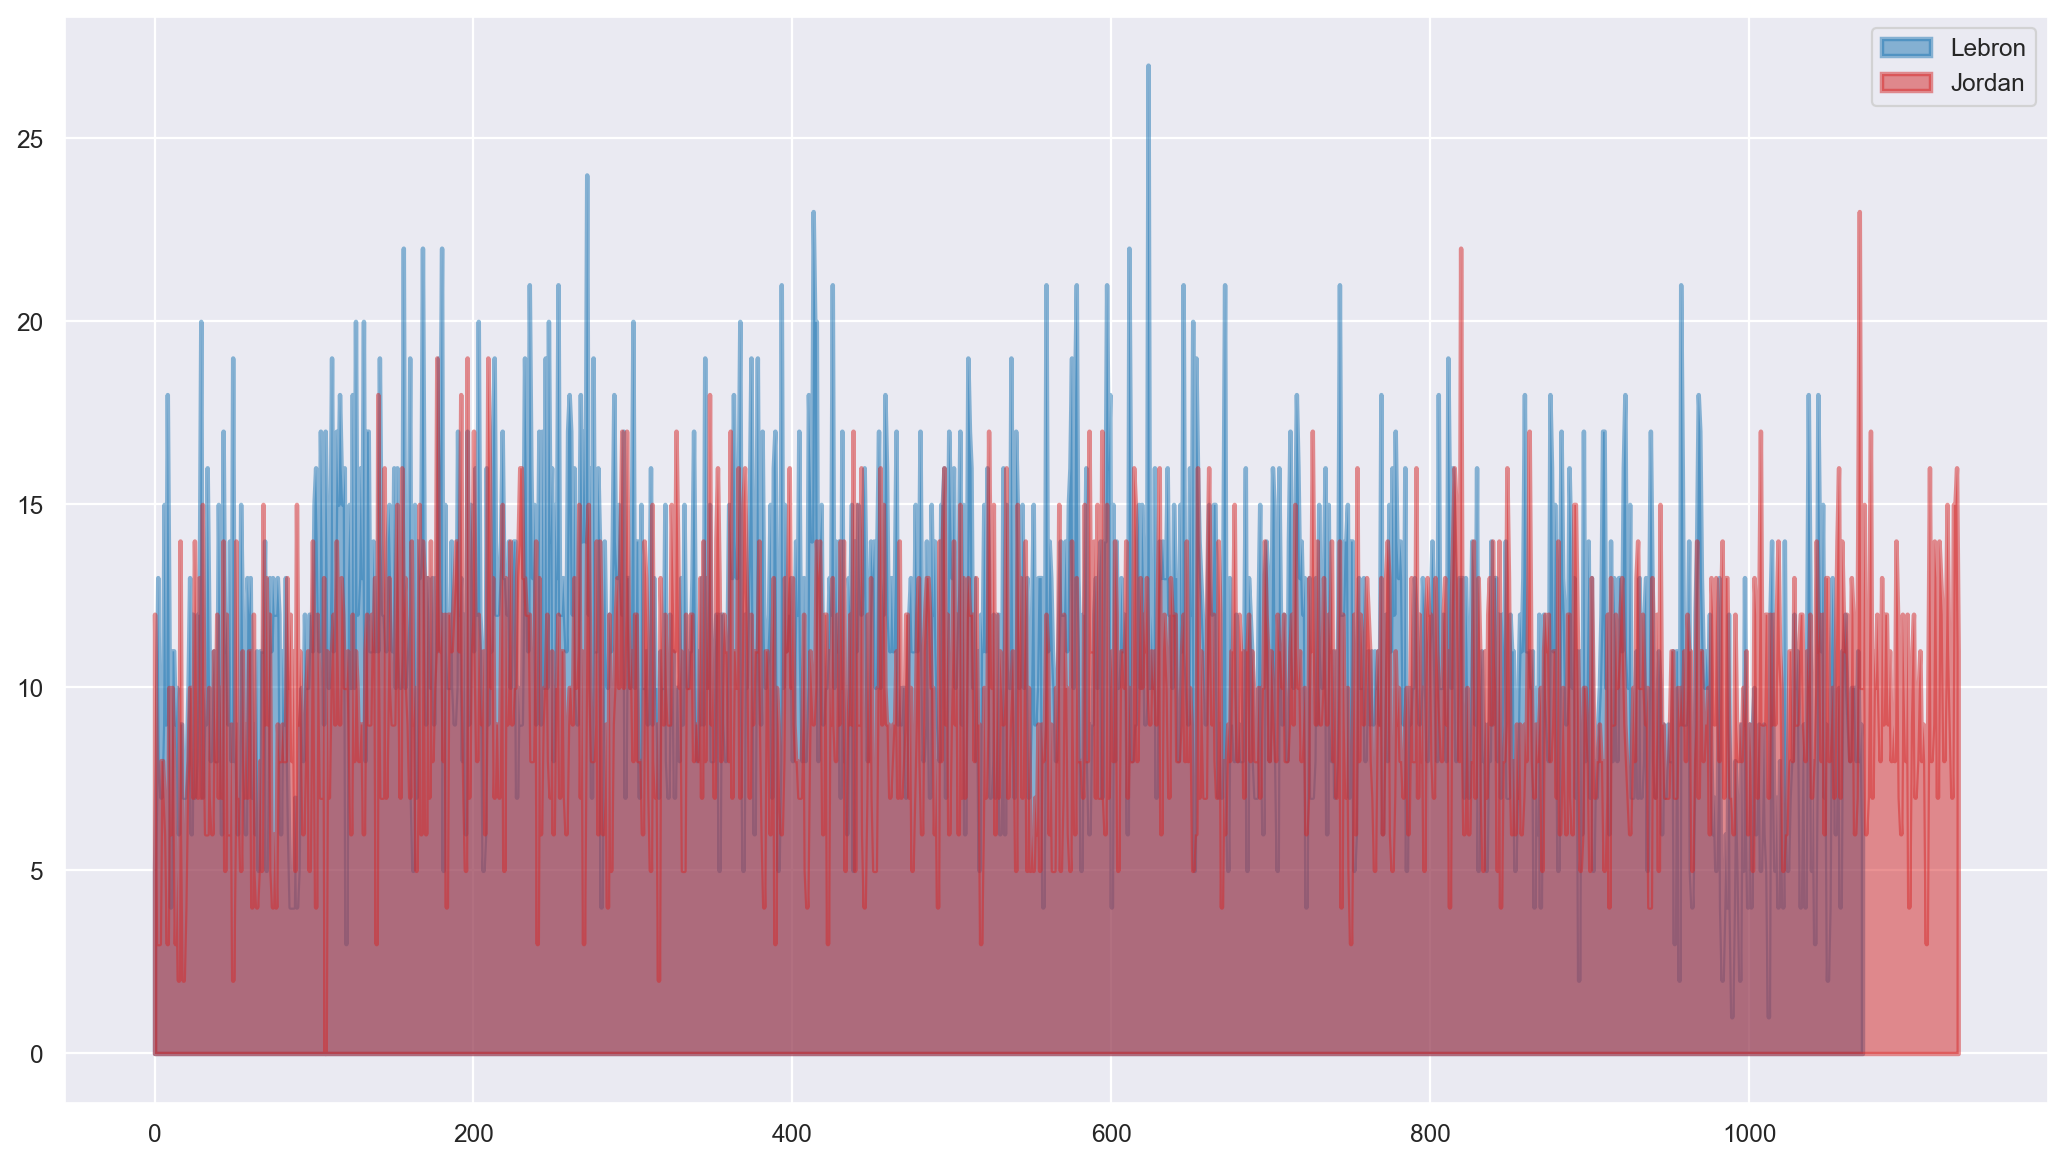

In [38]:
x1 = np.arange(0,1072).tolist()
x2 = np.arange(0,1132).tolist()

jordan_fg=jordan_df['fg']
lebron_fg=lebron_df['fg']

y1 = jordan_fg.values.tolist()

y2 = lebron_fg.values.tolist()

mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

columns = ['Jordan', 'Lebron']


fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)

ax.fill_between(x1, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)

ax.fill_between(x2, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

plt.legend(loc='upper right')

事實上Lebron的得分數多數情況是大於Jordan的

[章回目錄](#章回目錄)

# 將他們各項平均數距的差距，以長條圖呈現

posx and posy should be finite values
posx and posy should be finite values


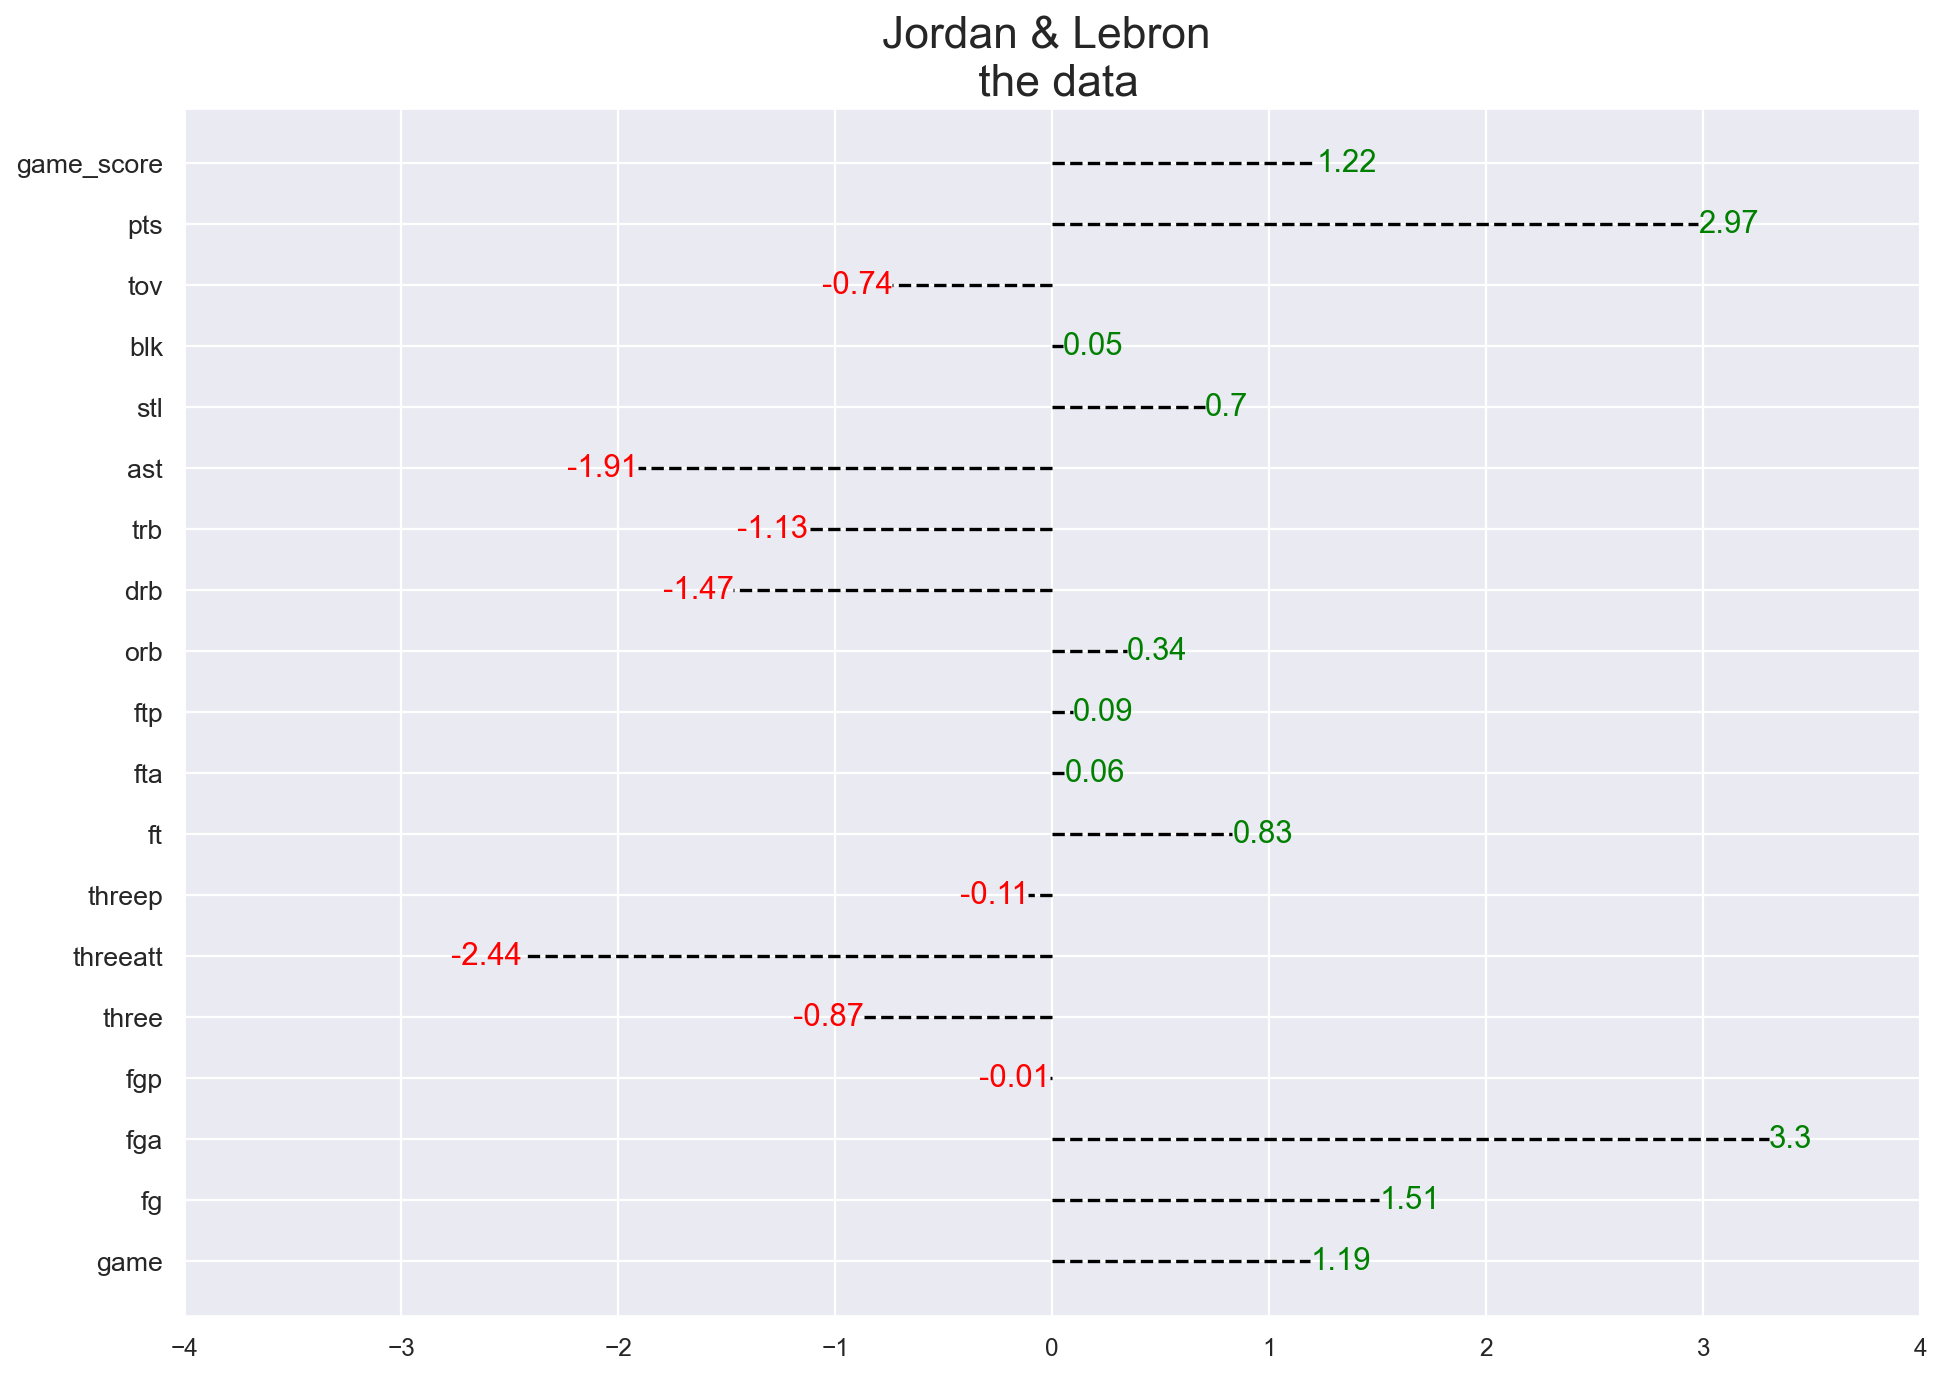

In [39]:
#畫圖
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=diff_mean.index, xmin=0, xmax=diff_mean, linestyle='--', colors='black')
for x, y, tex in zip(diff_mean, diff_mean.index, diff_mean):

    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',

                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})
#修飾圖    
plt.yticks(fontsize=12)

plt.title('Jordan & Lebron \n the data', fontdict={'size':20})

plt.xlim(-4, 4)

plt.show()


[章回目錄](#章回目錄)

# 總結

#### Michael Jordan和Lebron James是生在兩個時代背景完全不同的人，他們所面對的球風迥異
#### Michael Jordan，1990年代的球星，當時不重視三分球，禁區是個肉搏的場所，
#### 因此Michael Jordan的各項得分數據 和 Lebron James相比低了許多
#### 而Lebron James 剛好迎來了"小球時代"，各個球隊強化了三分球，弱化了禁區，因此Lebron James的得分數據相對較高
#### 因此誰比較厲害很難用數據來表示